Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.03 Convolution and Filtering - Time Domain</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 1</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.03.G1) The structure of timeseries data</font>

### <font color=red>DSP.03.G1.a) Compute the mean</font>

Here is a timeseries.

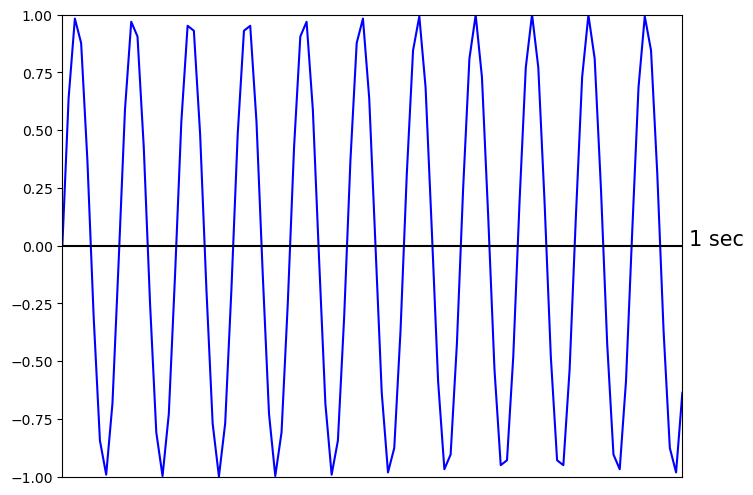

In [2]:
time = np.arange(0,1,1/100)
timeseries = np.sin(2*np.pi * 11 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Find the length of the dataset and look at the individual y-axis datapoints used to plot the function.

In [3]:
len(timeseries)

100

In [4]:
timeseries

array([ 0.00000000e+00,  6.37423990e-01,  9.82287251e-01,  8.76306680e-01,
        3.68124553e-01, -3.09016994e-01, -8.44327926e-01, -9.92114701e-01,
       -6.84547106e-01, -6.27905195e-02,  5.87785252e-01,  9.68583161e-01,
        9.04827052e-01,  4.25779292e-01, -2.48689887e-01, -8.09016994e-01,
       -9.98026728e-01, -7.28968627e-01, -1.25333234e-01,  5.35826795e-01,
        9.51056516e-01,  9.29776486e-01,  4.81753674e-01, -1.87381315e-01,
       -7.70513243e-01, -1.00000000e+00, -7.70513243e-01, -1.87381315e-01,
        4.81753674e-01,  9.29776486e-01,  9.51056516e-01,  5.35826795e-01,
       -1.25333234e-01, -7.28968627e-01, -9.98026728e-01, -8.09016994e-01,
       -2.48689887e-01,  4.25779292e-01,  9.04827052e-01,  9.68583161e-01,
        5.87785252e-01, -6.27905195e-02, -6.84547106e-01, -9.92114701e-01,
       -8.44327926e-01, -3.09016994e-01,  3.68124553e-01,  8.76306680e-01,
        9.82287251e-01,  6.37423990e-01,  4.89982516e-15, -6.37423990e-01,
       -9.82287251e-01, -

100 values.

Create a vector of 100 values, all 100 values the reciprocal of the length of the timeseries.

In [5]:
kernel = 0.01 * np.ones(100)
kernel

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

Multiply this new vector and the original timeseries to calculate the mean value. Add a sentence indicating
how you know your answer is correct.

### <font color=red>DSP.03.G1.b) Compute the mean</font>

Here is a timeseries.

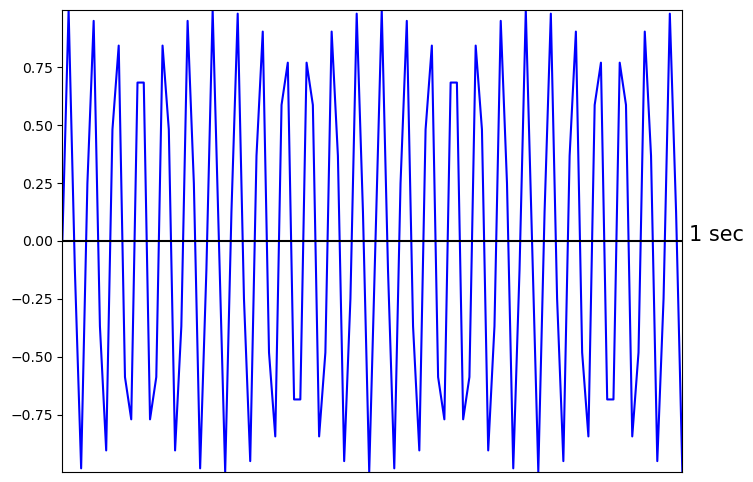

In [6]:
time = np.arange(0,1,1/100)
timeseries = np.sin(2*np.pi * 26 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Find the length of the dataset and look at the individual y-axis datapoints used to plot the function.

In [7]:
len(timeseries)

100

In [8]:
timeseries

array([ 0.00000000e+00,  9.98026728e-01, -1.25333234e-01, -9.82287251e-01,
        2.48689887e-01,  9.51056516e-01, -3.68124553e-01, -9.04827052e-01,
        4.81753674e-01,  8.44327926e-01, -5.87785252e-01, -7.70513243e-01,
        6.84547106e-01,  6.84547106e-01, -7.70513243e-01, -5.87785252e-01,
        8.44327926e-01,  4.81753674e-01, -9.04827052e-01, -3.68124553e-01,
        9.51056516e-01,  2.48689887e-01, -9.82287251e-01, -1.25333234e-01,
        9.98026728e-01, -1.96067284e-15, -9.98026728e-01,  1.25333234e-01,
        9.82287251e-01, -2.48689887e-01, -9.51056516e-01,  3.68124553e-01,
        9.04827052e-01, -4.81753674e-01, -8.44327926e-01,  5.87785252e-01,
        7.70513243e-01, -6.84547106e-01, -6.84547106e-01,  7.70513243e-01,
        5.87785252e-01, -8.44327926e-01, -4.81753674e-01,  9.04827052e-01,
        3.68124553e-01, -9.51056516e-01, -2.48689887e-01,  9.82287251e-01,
        1.25333234e-01, -9.98026728e-01,  3.92134568e-15,  9.98026728e-01,
       -1.25333234e-01, -

100 values.

Create a vector of 100 values, all 100 values the reciprocal of the length of the timeseries.

In [9]:
kernel = 0.01 * np.ones(100)
kernel

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

Multiply this new vector and the original timeseries to calculate the mean value. Add a sentence indicating
how you know your answer is correct.

### <font color=red>DSP.03.G1.c) Compute the mean</font>

Here is a timeseries sampled at 100 Hz.

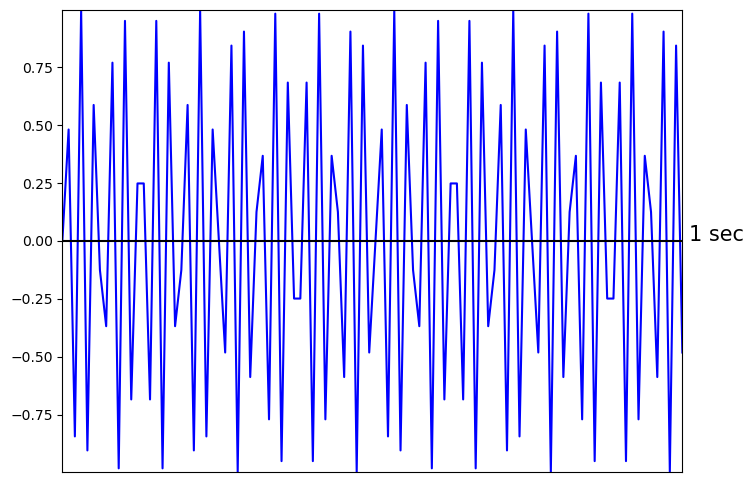

In [10]:
time = np.arange(0,1,1/100)
timeseries = np.sin(2*np.pi * 42 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Follow the procedures outlined above to calculate the mean value. Add a sentence indicating how you
know your answer is correct.

### <font color=red>DSP.03.G1.d) Compute the mean</font>

Here is a timeseries sampled at 300 Hz.

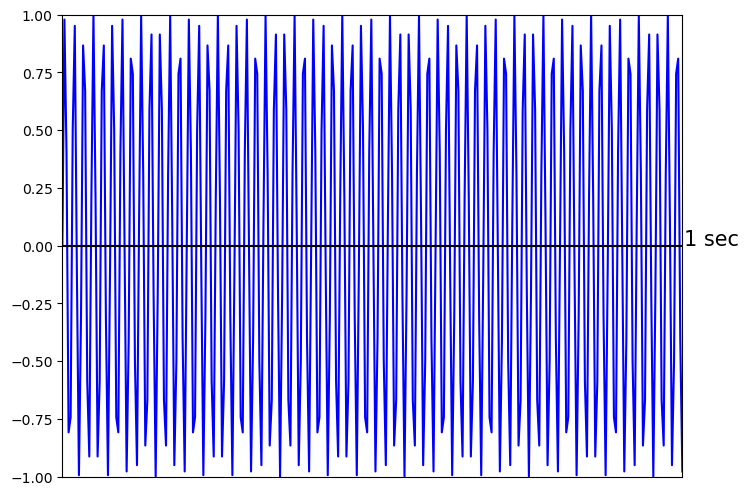

In [11]:
time = np.arange(0,1,1/300)
timeseries = np.sin(2*np.pi * 65 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Follow the procedures outlined above to calculate the mean.

### <font color=red>DSP.03.G1.e) Compute the mean</font>

Here is a timeseries sampled at 300 Hz.

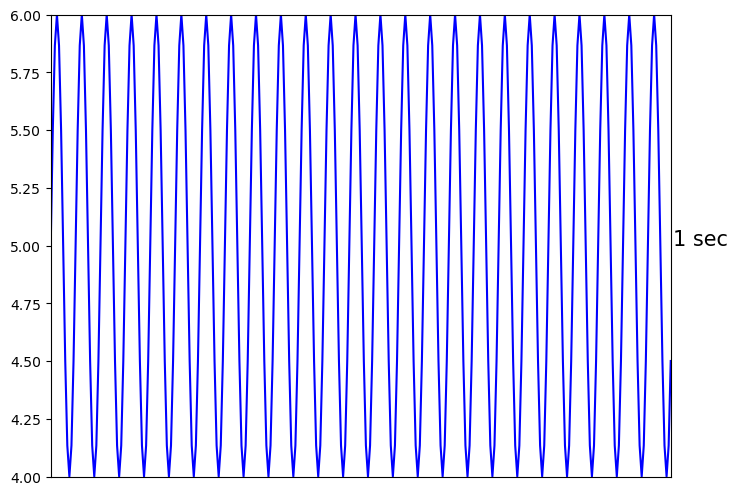

In [12]:
time = np.arange(0,1,1/300)
timeseries = np.sin(2*np.pi * 25 * time) + 5

make_plot_1(time,timeseries)
plt.text(1,5,'1 sec',fontsize=15)
plt.ylim([4,6])
plt.show()

Calculate the mean value. In addition, what is the DC offset for this timeseries?

### <font color=red>DSP.03.G1.f) Compute the mean</font>

Here is a timeseries sampled at 150 Hz.

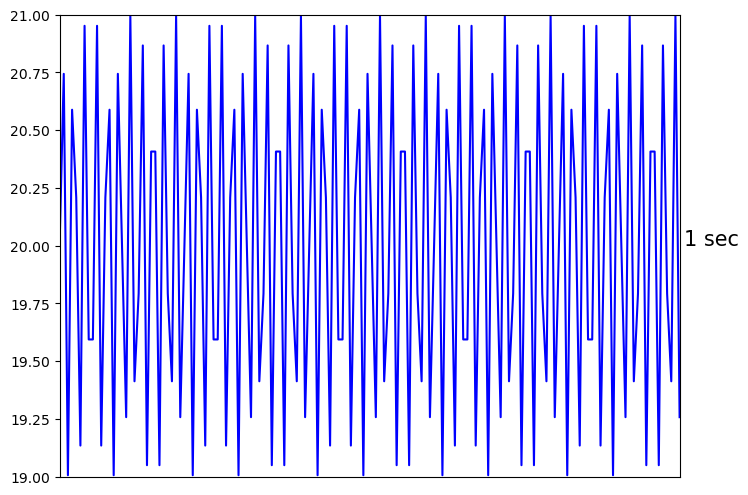

In [13]:
time = np.arange(0,1,1/150)
timeseries = np.sin(2*np.pi * 55 * time) + 20

make_plot_1(time,timeseries)
plt.text(1,20,'1 sec',fontsize=15)
plt.ylim([19,21])
plt.show()

Calculate the mean value. In addition, what is the DC offset for this timeseries?